# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

Edición 2022

In [1]:
!pip install emoji==1.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

import functools
import emoji
import operator
import re
from string import punctuation
from collections import Counter
from google.colab import drive

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tag import pos_tag, map_tag

sns.set_context('talk')
np.set_printoptions(suppress=True)  # no usar notacion "e"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


# Sincronizamos Google Colaboratory con Google Drive

In [3]:
# Declaramos la ruta principal
google_drive = "/content/gdrive"
root_path = os.path.join(google_drive, "My Drive", "Colab Notebooks", "mentodatos", "tercerentrega")

In [4]:
drive.mount(google_drive, force_remount = True)

Mounted at /content/gdrive


In [5]:
# load dataset
df = pd.read_csv(os.path.join(root_path, "data", "news_dataset.csv"))

df.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [6]:
df.category.value_counts(dropna=False)

opinion    125935
news        95578
Name: category, dtype: int64

In [7]:
df_test = df.copy()
df_test = df_test.sample(frac=0.25, random_state=42)

In [8]:
# dataset dimension
df_test.shape

(55378, 9)

In [9]:
# dataset information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55378 entries, 218354 to 106007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            55378 non-null  int64 
 1   ticker        55378 non-null  object
 2   title         55378 non-null  object
 3   category      55378 non-null  object
 4   content       55375 non-null  object
 5   release_date  55378 non-null  object
 6   provider      55378 non-null  object
 7   url           55378 non-null  object
 8   article_id    55378 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 4.2+ MB


In [10]:
df_test.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id
218354,439870,EBAY,Thomas H Lee in the lead to buy eBay s enterp...,news,By Liana B Baker and Greg Roumeliotis Reuter...,2015-07-09,Reuters,https://www.investing.com/news/technology-news...,350478
120157,341672,FMC,Sangamo Therapeutics SGMO Looks Good Stock ...,opinion,Sangamo Therapeutics Inc NASDAQ SGMO was...,2018-02-22,Zacks Investment Research,https://www.investing.com/analysis/sangamo-the...,200293565
113158,334673,NOC,NATO Canada bid to buy Euro Hawk surveillance...,news,BERLIN Reuters The German Defense Ministry...,2019-02-20,Reuters,https://www.investing.com/news/world-news/nato...,1784603
91115,312630,INTC,Demand Headwinds Make Intel Stock Look Vulnera...,opinion,Reports Q1 2019 results on Thursday April 2...,2019-04-25,Haris Anwar/Investing.com,https://www.investing.com/analysis/demand-head...,200410711
162260,383776,HD,High Costs Mar Building Products Retail Indu...,opinion,The industry comprises of U S home improveme...,2019-09-11,Zacks Investment Research,https://www.investing.com/analysis/high-costs-...,200464175


In [ ]:
#df = df[["text", "label"]]
#df

In [11]:
# check for missing values
df_test.isnull().sum()

id              0
ticker          0
title           0
category        0
content         3
release_date    0
provider        0
url             0
article_id      0
dtype: int64

In [12]:
df_test = df_test[["content", "title", "category"]]

In [13]:
df_test.head()

,content,title,category
218354,By Liana B Baker and Greg Roumeliotis Reuter...,Thomas H Lee in the lead to buy eBay s enterp...,news
120157,Sangamo Therapeutics Inc NASDAQ SGMO was...,Sangamo Therapeutics SGMO Looks Good Stock ...,opinion
113158,BERLIN Reuters The German Defense Ministry...,NATO Canada bid to buy Euro Hawk surveillance...,news
91115,Reports Q1 2019 results on Thursday April 2...,Demand Headwinds Make Intel Stock Look Vulnera...,opinion
162260,The industry comprises of U S home improveme...,High Costs Mar Building Products Retail Indu...,opinion


In [14]:
df_test.category.value_counts(dropna=False)

opinion    31638
news       23740
Name: category, dtype: int64

In [15]:
df_test["new_content"] = df_test["content"] + df_test["title"]

df_test = df_test[["new_content", "category"]]

df_test.head()

,new_content,category
218354,By Liana B Baker and Greg Roumeliotis Reuter...,news
120157,Sangamo Therapeutics Inc NASDAQ SGMO was...,opinion
113158,BERLIN Reuters The German Defense Ministry...,news
91115,Reports Q1 2019 results on Thursday April 2...,opinion
162260,The industry comprises of U S home improveme...,opinion


In [16]:
def pad_features(comments_ints, seq_length):
    ''' Return features of comments_ints, where each comment is padded with 0's 
        or truncated to the input seq_length.
    '''
    # getting the correct rows x cols shape
    features = np.zeros((len(comments_ints), seq_length), dtype=int)
    for i, row in enumerate(comments_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    return features


def encoding_words(comment, vocab):
    '''Use the vocab to tokenize each the comment
    Returns tokenized comment as comment_int'''
    
    comments_ints = [vocab[word] if word in vocab.keys() else 0 for word in comment.split()]
    return comments_ints

def dictionary_int(text):
    '''Build a dictionary that maps words to integers'''
    words = text.split()
    print(len(words))
    counts = Counter(words) #the words and their counts are stored as dictionary values
    print(counts, len(counts))
    vocabulary = sorted(counts.keys()) #words ordered alphabetically
    vocab_to_int = {word: ii for ii, word in enumerate(vocabulary, 1)}
    return vocab_to_int

def get_cleantext(text):
    '''Get text(comment). Returns the clean text'''
    text = text.lower() #lowercase, standardize
    text = re.sub(r"\d+", " ", text)
    split_emoji = emoji.get_emoji_regexp().split(text)#separate emojis from text)
    split_whitespace = [substr.split() for substr in split_emoji]#split emojis together
    list_text = functools.reduce(operator.concat, split_whitespace)#delete withespace caused by emojis
    new_list = []
    p = re.compile(r'[a-z-áéíóúñ]+')#search only words
    for word in list_text:
        if not emoji.is_emoji(word):
            word = ' '.join(p.findall(word)) #example  "mensaje...con" split = "mensaje con"
            word = re.sub(r'([abdefghijkmopqsu-zÀ-ÿ])\1{1,}', r'\1', word)
            if 'jaja' in word:
                word = 'jaja'
            if 'jeje' in word:
                word = 'jeje'
            if 'jiji' in word:
                word = 'jiji'
     
        new_list.append(word)

    text = ' '.join(new_list)
    
    return text

def foo(data):
    '''get list of dictionaries. Returns a list of numbers corresponding to the vocabulary'''
    list_comment = [str(item).lower() for item in data['new_content']]
    list_comment = [get_cleantext(comment) for comment in list_comment]
    all_text = ' '.join(list_comment)
    vocab = dictionary_int(all_text)
    list_comment_ints = [encoding_words(comment,vocab) for comment in list_comment]
    array_comments = pad_features(list_comment_ints, seq_length=70) #define length for comments
    labels = np.array([1 if item == 'opinion' else 0 for item in data['category']])
    return array_comments, labels, vocab, list_comment_ints

In [17]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
# f = open(os.path.join(os.getcwd(), "data", "vocab.json"),"w")
# f.write(str(vocab))
# f.close()

In [19]:
get_cleantext('holaaa CÓMO ESTÁS 222 jajajaajaja ejejej 😃!!..')

'hola cómo estás jaja jeje 😃 '

In [20]:
features, labels, vocab, list_comment_ints = foo(df_test)

31459689
Counter({'the': 1806473, 'to': 860672, 'of': 814639, 'in': 708524, 'and': 698024, 'a': 656667, 's': 445667, 'for': 340029, 'is': 330784, 'on': 295555, 'that': 261024, 'with': 202487, 'as': 202203, 'year': 196284, 'it': 188199, 'has': 181528, 'from': 177007, 'this': 176424, 'at': 175661, 'its': 166488, 'by': 156453, 'company': 152871, 'are': 151406, 'earnings': 145598, 'zacks': 140067, 'be': 122357, 'have': 115252, 'an': 114824, 'quarter': 112685, 'will': 106160, 'was': 105197, 'over': 97673, 'which': 96071, 'or': 94983, 'stocks': 92661, 'market': 90769, 'million': 89867, 'up': 89839, 'nyse': 87797, 'said': 87202, 'growth': 86288, 'more': 84171, 'stock': 82946, 'we': 81614, 'u': 81104, 'billion': 80171, 'you': 76945, 'also': 74515, 'but': 72976, 'than': 72507, 'not': 72217, 'nasdaq': 70799, 'new': 65696, 'rank': 65086, 'last': 64541, 'inc': 63419, 'ben': 57427, 'can': 57141, 'expected': 56824, 'per': 55928, 'while': 55728, 'after': 55221, 'investors': 55016, 'were': 54664, 'est

Text(0.5, 1.0, 'Histograma')

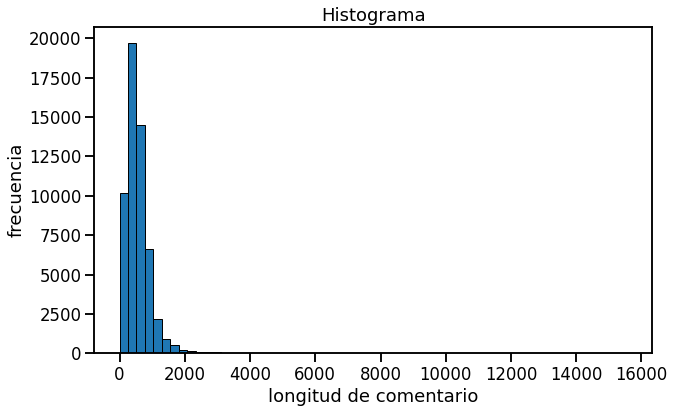

In [21]:
plt.figure(figsize=(10,6))
plt.hist(list(map(len, list_comment_ints)), bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.xlabel("longitud de comentario")
plt.ylabel("frecuencia")
plt.title("Histograma")

In [22]:
# separar emojis juntos, eliminar numeros y 'mensaje...mensaje'
msj = 'Este es un mensaje...con este problema😃😃😃 222 pero igual!!! '
msj = get_cleantext(msj)
msj = encoding_words(msj,vocab)
msj

[44016, 43741, 146474, 0, 25910, 44016, 0, 0, 0, 0, 0, 0]

In [23]:
len(vocab)

162841

In [25]:
#guardar como diccionario
import pickle
with open("vocab.pkl", 'wb') as f:
    pickle.dump(vocab, f)

In [26]:
# Datos de Entrenamiento, Validación y Prueba
import torch
from torch.utils.data import TensorDataset, DataLoader


def get_sets(features, labels, batch_size, split_frac):
    '''Returns sets training, validation, and test data (features and labels, x and y)'''
    split_idx = int(len(features)*split_frac) #quantity of data for training
    train_x, remaining_x = features[:split_idx], features[split_idx:]
    train_y, remaining_y = labels[:split_idx], labels[split_idx:]

    test_idx = int(len(remaining_x)*0.5)
    val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
    val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

    # remove the lasts batch if not has completed
    train_x = train_x[:int(split_idx/batch_size)*batch_size]
    train_y = train_y[:int(split_idx/batch_size)*batch_size]

    val_x = val_x[:int(test_idx/batch_size)*batch_size]
    val_y = val_y[:int(test_idx/batch_size)*batch_size]

    test_x = test_x[:int(test_idx/batch_size)*batch_size]
    test_y = test_y[:int(test_idx/batch_size)*batch_size]

    ## print out the shapes of your resultant feature data
    print("\t\t\tFeature Shapes:")
    print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

    # create Tensor datasets
    train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
    valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
    test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

    # make sure the SHUFFLE your training data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
    test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    return train_loader, valid_loader, test_loader

In [27]:
batch_size = 20

train_loader, valid_loader, test_loader = get_sets(features, labels, batch_size, split_frac=0.8)

print('')
print('cantidad lotes del train_loader', len(train_loader))
print('cantidad lotes del valid_loader', len(valid_loader))
print('cantidad lotes del test_loader', len(test_loader))

			Feature Shapes:
Train set: 		(44300, 70) 
Validation set: 	(5520, 70) 
Test set: 		(5520, 70)

cantidad lotes del train_loader 2215
cantidad lotes del valid_loader 276
cantidad lotes del test_loader 276


In [28]:
cont =0
for inputs, labels in train_loader:
    cont+=1
    print(labels, cont)

tensor([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]) 1
tensor([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]) 2
tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]) 3
tensor([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]) 4
tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]) 5
tensor([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]) 6
tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]) 7
tensor([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0]) 8
tensor([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]) 9
tensor([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]) 10
tensor([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]) 11
tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]) 12
tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]) 13
tensor([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]) 14
t

In [29]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([20, 70])
Sample input: 
 tensor([[159631, 101806, 131035,  ...,  97644, 134063,  98506],
        [ 18296,  70566, 118372,  ...,   1402, 128499,  83292],
        [ 68712,  25064,  66713,  ..., 140289,  24002,  85590],
        ...,
        [ 18296,  32029,   3630,  ...,  97346,  32564, 155333],
        [140289,  37348,  90016,  ..., 140289,  47028, 115511],
        [ 10490,  82612, 123343,  ...,  50858, 154748, 107616]])

Sample label size:  torch.Size([20])
Sample label: 
 tensor([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])


Modelo de Red RNN

In [30]:
# First checking if GPU is available
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):    
    print("Training on GPU.")    
else:    
    print("No GPU available, training on CPU.")

Training on GPU.


In [31]:
torch.cuda.is_available()

True

In [32]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# Inicializacion de la red
* `vocab_size`: Tamaño del vocabulario o rango de valores para nuestra entrada, tokens de palabras.
* `output_size`: Tamaño de la salida deseada (pos / neg).
* `embedding_dim`: Número de columnas en la tabla de embedding.
* `hidden_dim`: Número de nodos en capas ocultas. Por lo general, más grande tiene un mejor rendimiento. Los valores comnues son 128, 256, 512, etc.
* `n_layers`: Número de capas LSTM en la red. Normalmente entre 1-3

In [33]:
vocab_size = len(vocab)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 50
hidden_dim = 128
n_layers = 4

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(162842, 50)
  (lstm): LSTM(50, 128, num_layers=4, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


## Training

* `lr`: Tasa de aprendizaje.
* `epochs`: Número de veces que se itera a través del conjunto de datos de entrenamiento.
* `clip`: El valor de degradado máximo al que se recortará (para evitar la explosión de degradados).

In [34]:
def training_net(net, batch_size, train_loader, valid_loader):
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  epochs = 10
  counter = 0
  print_every = 100
  clip = 5 # gradient clipping

  # move model to GPU, if available
  if(train_on_gpu):
    net.cuda()
  net.train()

  train_losses, test_losses = [], []
  # train for some number of epochs
  for e in range(epochs):
    running_loss = 0 #######
    # initialize hidden state
    h = net.init_hidden(batch_size)    
    
    # batch loop    
    for inputs, labels in train_loader: 
      counter += 1
      if(train_on_gpu):  
        inputs, labels = inputs.cuda(), labels.cuda()
      
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])
      
      # zero accumulated gradients
      net.zero_grad()

      # get the output from the model
      output, h = net(inputs, h)
      # calculate the loss and perform backprop
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()
      running_loss += loss.item()
      
      # loss stats
      if counter % print_every == 0:
        # Get validation loss
        val_h = net.init_hidden(batch_size)
        val_losses = []
        net.eval()
        for inputs, labels in valid_loader:
          
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          val_h = tuple([each.data for each in val_h])
          if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()            
          output, val_h = net(inputs, val_h)          
          val_loss = criterion(output.squeeze(), labels.float())

          val_losses.append(val_loss.item())

        net.train()
        print("Epoch: {}/{}...".format(e+1, epochs),
                "Step: {}...".format(counter),
                "Loss: {:.6f}...".format(loss.item()),
                "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [35]:
#Utilizar este
import matplotlib.pyplot as plt

def training_net1(net, batch_size, train_loader, valid_loader):
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  epochs = 10
  counter = 0
  print_every = 100
  clip=5 # gradient clipping

  # move model to GPU, if available
  if(train_on_gpu):
    net.cuda()
  net.train()

  train_losses, validation_losses = [], []
  # train for some number of epochs
  for e in range(epochs):
    running_loss = 0
    # initialize hidden state
    h = net.init_hidden(batch_size)    
    
    # batch loop    
    for inputs, labels in train_loader: 
      counter += 1
      if(train_on_gpu):  
        inputs, labels = inputs.cuda(), labels.cuda()
      
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])
      
      # zero accumulated gradients
      net.zero_grad()

      # get the output from the model
      output, h = net(inputs, h)
      # calculate the loss and perform backprop
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()
      running_loss += loss.item()
    
    else:
      val_h = net.init_hidden(batch_size)
      val_losses = []      
      with torch.no_grad():
        net.eval()
        for inputs, labels in valid_loader:
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          val_h = tuple([each.data for each in val_h])
          if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()            
          output, val_h = net(inputs, val_h)          
          val_loss = criterion(output.squeeze(), labels.float())

          val_losses.append(val_loss.item())
      net.train() 
      print("Epoch: {}/{}...".format(e+1, epochs),
              "Step: {}...".format(counter),
              "Loss: {:.6f}...".format(running_loss/len(train_loader)),
              "Val Loss: {:.6f}".format(np.mean(val_losses)))

    train_losses.append(running_loss/len(train_loader))
    validation_losses.append(np.mean(val_losses))
  
  plt.plot(train_losses, label='Training losses')
  plt.plot(validation_losses, label='Validation losses')
  plt.legend(frameon=False)

In [36]:
print(len(train_loader))
print(len(valid_loader))

2215
276


Epoch: 1/10... Step: 2215... Loss: 0.485845... Val Loss: 0.275339
Epoch: 2/10... Step: 4430... Loss: 0.227327... Val Loss: 0.192645
Epoch: 3/10... Step: 6645... Loss: 0.167762... Val Loss: 0.172576
Epoch: 4/10... Step: 8860... Loss: 0.138571... Val Loss: 0.169673
Epoch: 5/10... Step: 11075... Loss: 0.111746... Val Loss: 0.163141
Epoch: 6/10... Step: 13290... Loss: 0.092844... Val Loss: 0.174714
Epoch: 7/10... Step: 15505... Loss: 0.075908... Val Loss: 0.191111
Epoch: 8/10... Step: 17720... Loss: 0.062204... Val Loss: 0.183350
Epoch: 9/10... Step: 19935... Loss: 0.054208... Val Loss: 0.176993
Epoch: 10/10... Step: 22150... Loss: 0.044820... Val Loss: 0.212515


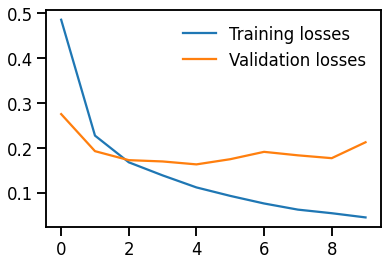

In [37]:
training_net1(net, batch_size, train_loader, valid_loader)

In [38]:
# Testing
def testing(net, test_loader):
  # Get test data loss and accuracy
  test_losses = [] # track loss
  num_correct = 0
  criterion = nn.BCELoss()
  #optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  # init hidden state
  h = net.init_hidden(batch_size)

  net.eval()
  # iterate over test data
  for inputs, labels in test_loader:
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])

      if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()
      
      # get predicted outputs
      output, h = net(inputs, h)
    
      # calculate loss
      test_loss = criterion(output.squeeze(), labels.float())
      test_losses.append(test_loss.item())
      
      # convert output probabilities to predicted class (0 or 1)
      pred = torch.round(output.squeeze())  # rounds to the nearest integer
      
      # compare predictions to true label
      correct_tensor = pred.eq(labels.float().view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      num_correct += np.sum(correct)

  # -- stats! -- ##
  # avg test loss
  print("Test loss: {:.3f}".format(np.mean(test_losses)))

  # accuracy over all test data
  test_acc = num_correct/len(test_loader.dataset)
  print("Length the test data", len(test_loader))
  print("Test accuracy: {:.3f}".format(test_acc))

In [39]:
testing(net, test_loader)

Test loss: 0.215
Length the test data 276
Test accuracy: 0.942


# Prueba usuario

In [40]:
def tokenize_comment(comment, vocab):
  test_ints = []
  comment = get_cleantext(comment)
  comment = encoding_words(comment,vocab)
  test_ints.append(comment)  
  comment = pad_features(test_ints, seq_length=100)
  return comment

def predict(net, test_comment, vocab ,sequence_length=100):
    
    net.eval()

    # tokenize review
    features = tokenize_comment(test_comment, vocab)
    
    # print('test int', test_ints)
    # # pad tokenized sequence
    # seq_length=sequence_length
    # features = pad_features(test_ints, seq_length)
    # print(features)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Opinion review detected!")
    else:
        print("News review detected.")
    return output.item()

In [45]:
test_comment = "Until commodities begin to break out of the downward price channels highlighted on this chart  global capital will be searching for two primary objectives  safety and hedged returns  By this  we mean to say that global capital and investment will seek out strong blue chip and mid cap performers that can produce safety in growth  dividends and hedge against currency swings or further eroding commodity price levels  Think of this as a move to key elements supporting the global economies"
predict(net, test_comment, vocab)

Prediction value, pre-rounding: 0.999821
Opinion review detected!


0.9998205304145813

# Descargar modelo

In [46]:
PATH = "./trainedModel.pth"
torch.save(net.state_dict(), PATH)